## Data Mining Project -April 2019
<li><strong>Title:</strong>Final Project on Data Mining
<li><strong>Allstate Claims Severity</strong>
<li><strong>Group No:</strong>5

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import time
from prettytable import PrettyTable

#### Data loading and Creating of Local DataFram
<li> Creating a local dataframe 'dataset' for train.csv dataset having 188318 rows and 132 columns

In [2]:
dataset = pd.read_csv("train.csv") 

pd.set_option('display.max_columns', None)
print (dataset.head())

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

## Missing data handling

####    If any data is missing then it will be replaced with
       1) Continuous values - replace with average (Mean) values 
       2) Categorial values - replace with frequent value

In [3]:
#finding missing values

print("Missing values",dataset.isnull().sum().sum())

Missing values 0


In [4]:
dataset.shape
#dataset_test.shape display number of columns and rows 

(188318, 132)

<li><strong> Train dataset has 188,318 number of rows and 132 columns including "id" and "loss" columns <strong>
<li><strong> Out of 132 columns, we have 116 categorial columns and 14 continous columns <strong>

### Descibing the continuous values

In [5]:
dataset.describe() # describing data for continuous values

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### Dividing the data based on the data Type

In [6]:
#dividing the data based on the data type (categorical vs. continuous)

continuous_data= [] 
categorical_data= []

for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categorical_data.append(i)
    elif dataset[i].dtype == 'float':
        continuous_data.append(i)

In [7]:
continuous_data = continuous_data[:14]

In [8]:
cat_data = dataset[categorical_data]

## Normalization of continuous data

In [9]:
cont_df = dataset[continuous_data]

In [10]:
normalizer = Normalizer()
cont_normal = normalizer.fit_transform (cont_df)

In [11]:
cont_normal.shape

(188318, 14)

In [12]:
cont_normal_df = pd.DataFrame(cont_normal, columns=continuous_data)

In [13]:
cont_normal_df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.322353,0.109147,0.083255,0.350465,0.137614,0.318832,0.148710,0.134303,0.297965,0.370642,0.252870,0.263921,0.365047,0.317268
1,0.166481,0.371263,0.298535,0.309340,0.446196,0.221083,0.219909,0.302659,0.176935,0.221221,0.170408,0.184510,0.307979,0.153375
2,0.185172,0.253401,0.342420,0.167551,0.280804,0.204837,0.223151,0.193205,0.184408,0.229456,0.269722,0.264083,0.138404,0.547668
3,0.195758,0.338311,0.321394,0.227546,0.257040,0.268408,0.238084,0.193546,0.195567,0.270676,0.199606,0.195744,0.368318,0.366835
4,0.210998,0.123562,0.407773,0.365459,0.543914,0.137620,0.191076,0.189710,0.170596,0.163962,0.158082,0.156171,0.189997,0.334106


## Correlation between Continous data

In [14]:
corr= cont_normal_df.corr()

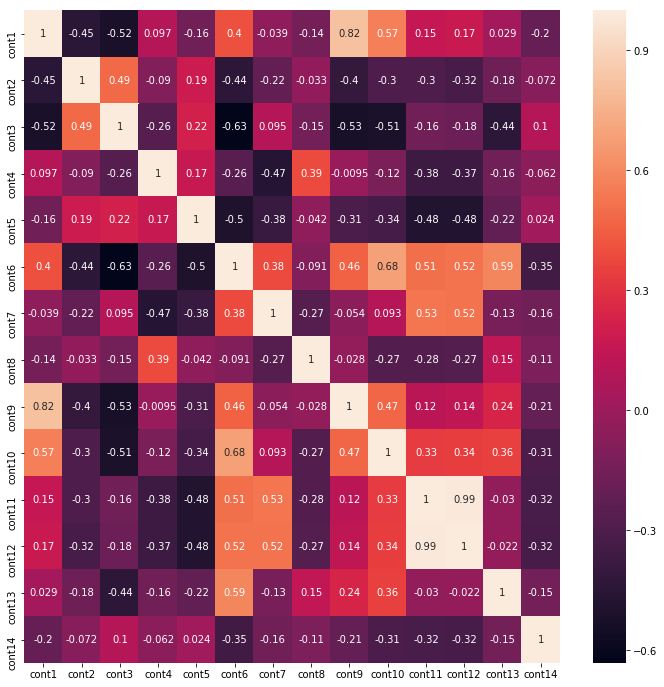

In [15]:
plt.subplots(figsize=(12,12))
sns.heatmap(corr,annot=True)

## Understading unique values in each Categorical Columns

116 categorial data columns

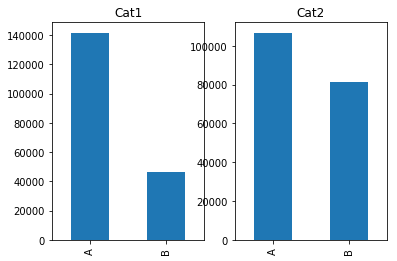

In [16]:
fig, axs = plt.subplots(1,2)
dataset['cat1'].value_counts().plot(kind='bar',ax=axs[0],title="Cat1")
dataset['cat2'].value_counts().plot(kind='bar',ax=axs[1],title="Cat2")

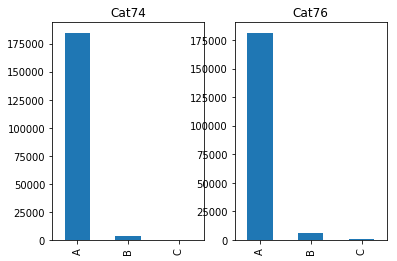

In [17]:
fig, axs = plt.subplots(1,2)
dataset['cat74'].value_counts().plot(kind='bar',ax=axs[0],title="Cat74")
dataset['cat76'].value_counts().plot(kind='bar',ax=axs[1],title="Cat76")

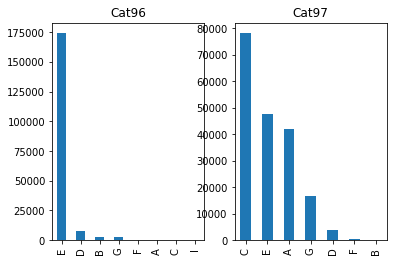

In [18]:
fig, axs = plt.subplots(1,2)
dataset['cat96'].value_counts().plot(kind='bar',ax=axs[0],title="Cat96")
dataset['cat97'].value_counts().plot(kind='bar',ax=axs[1],title="Cat97")

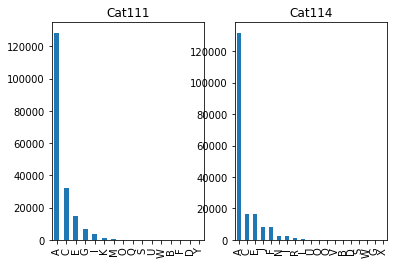

In [19]:
fig, axs = plt.subplots(1,2)
dataset['cat111'].value_counts().plot(kind='bar',ax=axs[0],title="Cat111")
dataset['cat114'].value_counts().plot(kind='bar',ax=axs[1],title="Cat114")

## One hot encoding for Categorical Values

In [20]:
cat_data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK


In [21]:
enc = ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
cat_ohe = enc.fit_transform(cat_data)
cat_ohe.head()

,cat1_A,cat1_B,cat2_B,cat2_A,cat3_A,cat3_B,cat4_B,cat4_A,cat5_A,cat5_B,cat6_A,cat6_B,cat7_A,cat7_B,cat8_A,cat8_B,cat9_B,cat9_A,cat10_A,cat10_B,cat11_B,cat11_A,cat12_A,cat12_B,cat13_A,cat13_B,cat14_A,cat14_B,cat15_A,cat15_B,cat16_A,cat16_B,cat17_A,cat17_B,cat18_A,cat18_B,cat19_A,cat19_B,cat20_A,cat20_B,cat21_A,cat21_B,cat22_A,cat22_B,cat23_B,cat23_A,cat24_A,cat24_B,cat25_A,cat25_B,cat26_A,cat26_B,cat27_A,cat27_B,cat28_A,cat28_B,cat29_A,cat29_B,cat30_A,cat30_B,cat31_A,cat31_B,cat32_A,cat32_B,cat33_A,cat33_B,cat34_A,cat34_B,cat35_A,cat35_B,cat36_A,cat36_B,cat37_A,cat37_B,cat38_A,cat38_B,cat39_A,cat39_B,cat40_A,cat40_B,cat41_A,cat41_B,cat42_A,cat42_B,cat43_A,cat43_B,cat44_A,cat44_B,cat45_A,cat45_B,cat46_A,cat46_B,cat47_A,cat47_B,cat48_A,cat48_B,cat49_A,cat49_B,cat50_A,cat50_B,cat51_A,cat51_B,cat52_A,cat52_B,cat53_A,cat53_B,cat54_A,cat54_B,cat55_A,cat55_B,cat56_A,cat56_B,cat57_A,cat57_B,cat58_A,cat58_B,cat59_A,cat59_B,cat60_A,cat60_B,cat61_A,cat61_B,cat62_A,cat62_B,cat63_A,cat63_B,cat64_A,cat64_B,cat65_A,cat65_B,cat66_A,cat66_B,cat67_A,cat67_B,cat68_A,cat68_B,cat69_A,cat69_B,cat70_A,cat70_B,cat71_A,cat71_B,cat72_A,cat72_B,cat73_A,cat73_B,cat73_C,cat74_A,cat74_B,cat74_C,cat75_B,cat75_A,cat75_C,cat76_A,cat76_C,cat76_B,cat77_D,cat77_C,cat77_B,cat77_A,cat78_B,cat78_A,cat78_C,cat78_D,cat79_B,cat79_D,cat79_A,cat79_C,cat80_D,cat80_B,cat80_A,cat80_C,cat81_D,cat81_B,cat81_A,cat81_C,cat82_B,cat82_A,cat82_D,cat82_C,cat83_D,cat83_B,cat83_A,cat83_C,cat84_C,cat84_A,cat84_D,cat84_B,cat85_B,cat85_A,cat85_C,cat85_D,cat86_D,cat86_B,cat86_C,cat86_A,cat87_B,cat87_C,cat87_D,cat87_A,cat88_A,cat88_D,cat88_E,cat88_B,cat89_A,cat89_B,cat89_C,cat89_E,cat89_D,cat89_H,cat89_I,cat89_G,cat90_A,cat90_B,cat90_C,cat90_D,cat90_F,cat90_E,cat90_G,cat91_A,cat91_B,cat91_G,cat91_C,cat91_D,cat91_E,cat91_F,cat91_H,cat92_A,cat92_H,cat92_B,cat92_C,cat92_D,cat92_I,cat92_F,cat93_D,cat93_C,cat93_A,cat93_B,cat93_E,cat94_B,cat94_D,cat94_C,cat94_A,cat94_F,cat94_E,cat94_G,cat95_C,cat95_D,cat95_E,cat95_A,cat95_B,cat96_E,cat96_D,cat96_G,cat96_B,cat96_F,cat96_A,cat96_I,cat96_C,cat97_A,cat97_E,cat97_C,cat97_G,cat97_D,cat97_F,cat97_B,cat98_C,cat98_D,cat98_A,cat98_E,cat98_B,cat99_T,cat99_D,cat99_P,cat99_S,cat99_R,cat99_K,cat99_E,cat99_F,cat99_N,cat99_J,cat99_C,cat99_M,cat99_H,cat99_G,cat99_I,cat99_O,cat100_B,cat100_L,cat100_I,cat100_F,cat100_J,cat100_H,cat100_C,cat100_M,cat100_A,cat100_G,cat100_O,cat100_N,cat100_K,cat100_D,cat100_E,cat101_G,cat101_F,cat101_O,cat101_D,cat101_J,cat101_A,cat101_C,cat101_Q,cat101_M,cat101_I,cat101_L,cat101_R,cat101_S,cat101_E,cat101_N,cat101_H,cat101_B,cat101_U,cat101_K,cat102_A,cat102_C,cat102_B,cat102_D,cat102_G,cat102_E,cat102_F,cat102_H,cat102_J,cat103_A,cat103_B,cat103_C,cat103_F,cat103_E,cat103_D,cat103_G,cat103_H,cat103_I,cat103_L,cat103_K,cat103_J,cat103_N,cat104_I,cat104_E,cat104_D,cat104_K,cat104_H,cat104_F,cat104_G,cat104_P,cat104_C,cat104_J,cat104_L,cat104_M,cat104_N,cat104_O,cat104_B,cat104_A,cat104_Q,cat105_E,cat105_F,cat105_H,cat105_G,cat105_I,cat105_D,cat105_J,cat105_K,cat105_M,cat105_C,cat105_A,cat105_L,cat105_N,cat105_P,cat105_T,cat105_Q,cat105_R,cat105_O,cat105_B,cat105_S,cat106_G,cat106_I,cat106_H,cat106_K,cat106_F,cat106_J,cat106_E,cat106_L,cat106_M,cat106_D,cat106_A,cat106_C,cat106_N,cat106_O,cat106_R,cat106_B,cat106_P,cat107_J,cat107_K,cat107_F,cat107_G,cat107_I,cat107_M,cat107_H,cat107_L,cat107_E,cat107_D,cat107_O,cat107_C,cat107_N,cat107_A,cat107_Q,cat107_P,cat107_U,cat107_B,cat107_R,cat107_S,cat108_G,cat108_K,cat108_A,cat108_B,cat108_D,cat108_I,cat108_F,cat108_H,cat108_E,cat108_C,cat108_J,cat109_BU,cat109_BI,cat109_AB,cat109_H,cat109_K,cat109_CD,cat109_BQ,cat109_M,cat109_G,cat109_BL,cat109_L,cat109_AL,cat109_N,cat109_CL,cat109_R,cat109_F,cat109_BJ,cat109_AR,cat109_AT,cat109_S,cat109_AS,cat109_BO,cat109_X,cat109_D,cat109_BM,cat109_I,cat109_BH,cat109_CI,cat109_CF,cat109_C,cat109_AM,cat109_U,cat109_BE,cat109_BR,cat109_CJ,cat109_AE,cat109_A,cat109_Q,cat109_AW,cat109_T,cat109_AJ,cat109_AH,cat109_BA,cat109_BV,cat109_CC,cat109_CA,cat109_BG

In [22]:
cat_ohe.shape

(188318, 1139)

### Merging both normalized continuous data and onehot encoded categorical data

In [23]:
final_df = pd.merge(cat_ohe, cont_normal_df, left_index=True, right_index=True)

In [24]:
final_df.head()

,cat1_A,cat1_B,cat2_B,cat2_A,cat3_A,cat3_B,cat4_B,cat4_A,cat5_A,cat5_B,cat6_A,cat6_B,cat7_A,cat7_B,cat8_A,cat8_B,cat9_B,cat9_A,cat10_A,cat10_B,cat11_B,cat11_A,cat12_A,cat12_B,cat13_A,cat13_B,cat14_A,cat14_B,cat15_A,cat15_B,cat16_A,cat16_B,cat17_A,cat17_B,cat18_A,cat18_B,cat19_A,cat19_B,cat20_A,cat20_B,cat21_A,cat21_B,cat22_A,cat22_B,cat23_B,cat23_A,cat24_A,cat24_B,cat25_A,cat25_B,cat26_A,cat26_B,cat27_A,cat27_B,cat28_A,cat28_B,cat29_A,cat29_B,cat30_A,cat30_B,cat31_A,cat31_B,cat32_A,cat32_B,cat33_A,cat33_B,cat34_A,cat34_B,cat35_A,cat35_B,cat36_A,cat36_B,cat37_A,cat37_B,cat38_A,cat38_B,cat39_A,cat39_B,cat40_A,cat40_B,cat41_A,cat41_B,cat42_A,cat42_B,cat43_A,cat43_B,cat44_A,cat44_B,cat45_A,cat45_B,cat46_A,cat46_B,cat47_A,cat47_B,cat48_A,cat48_B,cat49_A,cat49_B,cat50_A,cat50_B,cat51_A,cat51_B,cat52_A,cat52_B,cat53_A,cat53_B,cat54_A,cat54_B,cat55_A,cat55_B,cat56_A,cat56_B,cat57_A,cat57_B,cat58_A,cat58_B,cat59_A,cat59_B,cat60_A,cat60_B,cat61_A,cat61_B,cat62_A,cat62_B,cat63_A,cat63_B,cat64_A,cat64_B,cat65_A,cat65_B,cat66_A,cat66_B,cat67_A,cat67_B,cat68_A,cat68_B,cat69_A,cat69_B,cat70_A,cat70_B,cat71_A,cat71_B,cat72_A,cat72_B,cat73_A,cat73_B,cat73_C,cat74_A,cat74_B,cat74_C,cat75_B,cat75_A,cat75_C,cat76_A,cat76_C,cat76_B,cat77_D,cat77_C,cat77_B,cat77_A,cat78_B,cat78_A,cat78_C,cat78_D,cat79_B,cat79_D,cat79_A,cat79_C,cat80_D,cat80_B,cat80_A,cat80_C,cat81_D,cat81_B,cat81_A,cat81_C,cat82_B,cat82_A,cat82_D,cat82_C,cat83_D,cat83_B,cat83_A,cat83_C,cat84_C,cat84_A,cat84_D,cat84_B,cat85_B,cat85_A,cat85_C,cat85_D,cat86_D,cat86_B,cat86_C,cat86_A,cat87_B,cat87_C,cat87_D,cat87_A,cat88_A,cat88_D,cat88_E,cat88_B,cat89_A,cat89_B,cat89_C,cat89_E,cat89_D,cat89_H,cat89_I,cat89_G,cat90_A,cat90_B,cat90_C,cat90_D,cat90_F,cat90_E,cat90_G,cat91_A,cat91_B,cat91_G,cat91_C,cat91_D,cat91_E,cat91_F,cat91_H,cat92_A,cat92_H,cat92_B,cat92_C,cat92_D,cat92_I,cat92_F,cat93_D,cat93_C,cat93_A,cat93_B,cat93_E,cat94_B,cat94_D,cat94_C,cat94_A,cat94_F,cat94_E,cat94_G,cat95_C,cat95_D,cat95_E,cat95_A,cat95_B,cat96_E,cat96_D,cat96_G,cat96_B,cat96_F,cat96_A,cat96_I,cat96_C,cat97_A,cat97_E,cat97_C,cat97_G,cat97_D,cat97_F,cat97_B,cat98_C,cat98_D,cat98_A,cat98_E,cat98_B,cat99_T,cat99_D,cat99_P,cat99_S,cat99_R,cat99_K,cat99_E,cat99_F,cat99_N,cat99_J,cat99_C,cat99_M,cat99_H,cat99_G,cat99_I,cat99_O,cat100_B,cat100_L,cat100_I,cat100_F,cat100_J,cat100_H,cat100_C,cat100_M,cat100_A,cat100_G,cat100_O,cat100_N,cat100_K,cat100_D,cat100_E,cat101_G,cat101_F,cat101_O,cat101_D,cat101_J,cat101_A,cat101_C,cat101_Q,cat101_M,cat101_I,cat101_L,cat101_R,cat101_S,cat101_E,cat101_N,cat101_H,cat101_B,cat101_U,cat101_K,cat102_A,cat102_C,cat102_B,cat102_D,cat102_G,cat102_E,cat102_F,cat102_H,cat102_J,cat103_A,cat103_B,cat103_C,cat103_F,cat103_E,cat103_D,cat103_G,cat103_H,cat103_I,cat103_L,cat103_K,cat103_J,cat103_N,cat104_I,cat104_E,cat104_D,cat104_K,cat104_H,cat104_F,cat104_G,cat104_P,cat104_C,cat104_J,cat104_L,cat104_M,cat104_N,cat104_O,cat104_B,cat104_A,cat104_Q,cat105_E,cat105_F,cat105_H,cat105_G,cat105_I,cat105_D,cat105_J,cat105_K,cat105_M,cat105_C,cat105_A,cat105_L,cat105_N,cat105_P,cat105_T,cat105_Q,cat105_R,cat105_O,cat105_B,cat105_S,cat106_G,cat106_I,cat106_H,cat106_K,cat106_F,cat106_J,cat106_E,cat106_L,cat106_M,cat106_D,cat106_A,cat106_C,cat106_N,cat106_O,cat106_R,cat106_B,cat106_P,cat107_J,cat107_K,cat107_F,cat107_G,cat107_I,cat107_M,cat107_H,cat107_L,cat107_E,cat107_D,cat107_O,cat107_C,cat107_N,cat107_A,cat107_Q,cat107_P,cat107_U,cat107_B,cat107_R,cat107_S,cat108_G,cat108_K,cat108_A,cat108_B,cat108_D,cat108_I,cat108_F,cat108_H,cat108_E,cat108_C,cat108_J,cat109_BU,cat109_BI,cat109_AB,cat109_H,cat109_K,cat109_CD,cat109_BQ,cat109_M,cat109_G,cat109_BL,cat109_L,cat109_AL,cat109_N,cat109_CL,cat109_R,cat109_F,cat109_BJ,cat109_AR,cat109_AT,cat109_S,cat109_AS,cat109_BO,cat109_X,cat109_D,cat109_BM,cat109_I,cat109_BH,cat109_CI,cat109_CF,cat109_C,cat109_AM,cat109_U,cat109_BE,cat109_BR,cat109_CJ,cat109_AE,cat109_A,cat109_Q,cat109_AW,cat109_T,cat109_AJ,cat109_AH,cat109_BA,cat109_BV,cat109_CC,cat109_CA,cat109_BG

## Assigning the dataset as X and Y

In [25]:
X=final_df
Y=dataset['loss']

In [26]:
Y.head()

0    2213.18
1    1283.60
2    3005.09
3     939.85
4    2763.85
Name: loss, dtype: float64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values, test_size=0.33, random_state=7) 

#X_text and Y-test are the datasets to test, in this case are 33% of the dataset
#random state ensures not to change the output everytime

In [28]:
X_train.shape #67% of the train dataset

(126173, 1153)

In [29]:
X_test.shape #33% of the train dataset as test

(62145, 1153)

In [30]:
Y_train.shape #67% of the train dataset

(126173,)

In [31]:
Y_test.shape #33% of the train dataset as test

(62145,)

## RandomForest Regression

In [32]:
start_time = time.time()

RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

print("Time taken for RFR - " " %s seconds ---" % (time.time() - start_time))

Time taken for RFR -  174.02413201332092 seconds ---


In [33]:
y_pred_RFR = RFR.predict(X_test)

In [34]:
y_pred_RFR

array([10619.086,  1313.971,  1572.626, ...,  2242.969,  2418.386,
        1369.398])

In [35]:
mean_absolute_error(Y_test, y_pred_RFR)

1316.2796934052083

## Linear Regression

In [36]:
start_time = time.time()


LR=LinearRegression()
LR.fit(X_train,Y_train)

print("Time taken for LR - " " %s seconds ---" % (time.time() - start_time))

Time taken for LR -  14.244157075881958 seconds ---


In [37]:
y_pred_LR = LR.predict(X_test)

In [38]:
y_pred_LR

array([11158.,  1698.,  1004., ...,  4966.,  1570.,  2982.])

In [39]:
mean_absolute_error(Y_test, LR.predict(X_test))

1325.572383171299

## Decision Tree Regression

In [40]:
start_time = time.time()

DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)

print("Time taken for DTR - " " %s seconds ---" % (time.time() - start_time))

Time taken for DTR -  30.389944076538086 seconds ---


In [43]:
y_pred_DTR = DTR.predict(X_test)

In [44]:
y_pred_DTR

array([9402.  ,  414.4 , 2798.32, ..., 3190.54, 3236.57,  935.22])

In [45]:
mean_absolute_error(Y_test, DTR.predict(X_test))

1769.0551345240967

## Adaboost Regression

In [46]:
start_time = time.time()

AR = AdaBoostRegressor()
AR.fit(X_train, Y_train)

print("Time taken for AR - " " %s seconds ---" % (time.time() - start_time))

Time taken for AR -  376.8273639678955 seconds ---


In [47]:
y_pred_AR = AR.predict(X_test)

In [48]:
y_pred_AR

array([9925.70235561, 6274.75955967, 4931.95247577, ..., 6533.68768854,
       6169.71265773, 6029.67294107])

In [49]:
mean_absolute_error(Y_test, AR.predict(X_test))

3416.9295597562877

# Comparison of models

In [50]:
MAETable = PrettyTable()

MAETable.field_names = ["Model Name", "Mean Absolute Error", "Time Taken for the model in seconds"]


MAETable.add_row(["Random Forest Regression", 1316.2796934052083, 174.02413201332092])
MAETable.add_row(["Linear Regression", 1325.572383171299, 14.244157075881958])
MAETable.add_row(["Decision Tree Regression",1769.0551345240967, 30.389944076538086])
MAETable.add_row(["Adaboost Regression", 3416.9295597562877, 376.8273639678955 ])

print(MAETable)

+--------------------------+---------------------+-------------------------------------+
|        Model Name        | Mean Absolute Error | Time Taken for the model in seconds |
+--------------------------+---------------------+-------------------------------------+
| Random Forest Regression |  1316.2796934052083 |          174.02413201332092         |
|    Linear Regression     |  1325.572383171299  |          14.244157075881958         |
| Decision Tree Regression |  1769.0551345240967 |          30.389944076538086         |
|   Adaboost Regression    |  3416.9295597562877 |          376.8273639678955          |
+--------------------------+---------------------+-------------------------------------+


In [51]:
LossTable = PrettyTable()

LossTable.field_names = ["Model Name", "Predicted Loss"]


LossTable.add_row(["Random Forest Regression", y_pred_RFR])
LossTable.add_row(["Linear Regression",y_pred_LR ])
LossTable.add_row(["Decision Tree Regression",y_pred_DTR])
LossTable.add_row(["Adaboost Regression", y_pred_AR])

print(LossTable)

+--------------------------+----------------------------------------------------------------------------+
|        Model Name        |                               Predicted Loss                               |
+--------------------------+----------------------------------------------------------------------------+
| Random Forest Regression |     [10619.086  1313.971  1572.626 ...  2242.969  2418.386  1369.398]      |
|    Linear Regression     |              [11158.  1698.  1004. ...  4966.  1570.  2982.]               |
| Decision Tree Regression |           [9402.    414.4  2798.32 ... 3190.54 3236.57  935.22]            |
|   Adaboost Regression    | [9925.70235561 6274.75955967 4931.95247577 ... 6533.68768854 6169.71265773 |
|                          |                               6029.67294107]                               |
+--------------------------+----------------------------------------------------------------------------+


# THE END